In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [0]:
df = pd.read_csv('/content/drive/My Drive/ANALISIS_NUMERICO/co_properties.csv')

In [0]:
df_venta = df[df.operation_type == "Venta"]

In [5]:
df_venta.shape

(638921, 25)

In [6]:
df_venta.isna().sum()

id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                108134
lon                108134
l1                      0
l2                      0
l3                  79885
l4                 463093
l5                 556087
l6                 620279
rooms              352685
bedrooms           369752
bathrooms           95134
surface_total      239092
surface_covered    339302
price                5953
currency            10799
price_period       476507
title                   0
description             6
property_type           0
operation_type          0
dtype: int64

In [7]:
df_venta.drop('l1',axis=1,inplace=True)
df_venta.drop('l4',axis=1,inplace=True)
df_venta.drop('l5',axis=1,inplace=True)
df_venta.drop('l6',axis=1,inplace=True)
df_venta.drop('price_period',axis=1,inplace=True)
df_venta.drop('bedrooms',axis=1,inplace=True)
df_venta.drop('id',axis=1,inplace=True)
df_venta.drop('bathrooms',axis=1,inplace=True)
df_venta.drop('currency',axis=1,inplace=True)
df_venta =  df_venta.drop(df_venta[df_venta.price.isna()].index)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
df_venta.shape

(632968, 16)

In [9]:
df_venta.isna().sum()

ad_type                 0
start_date              0
end_date                0
created_on              0
lat                106414
lon                106414
l2                      0
l3                  78991
rooms              348132
surface_total      237124
surface_covered    335443
price                   0
title                   0
description             6
property_type           0
operation_type          0
dtype: int64

In [10]:
df_venta.head()

,ad_type,start_date,end_date,created_on,lat,lon,l2,l3,rooms,surface_total,surface_covered,price,title,description,property_type,operation_type
0,Propiedad,2018-12-08,2019-07-25,2018-12-08,10.998798,-74.820729,Atlántico,Barranquilla,4.0,546.0,306.0,1.000000e+09,Venta casa en La Campia en Barranquilla,Se vende espectacular casa ubicada en el barri...,Casa,Venta
1,Propiedad,2018-09-06,2019-05-22,2018-09-06,8.746055,-75.874554,Córdoba,NaN,4.0,NaN,98.0,1.100000e+08,VENDO CASA EN EL B/LA ESMERALDA- MONTERA,SILVA CUESTA INMOBILIARIA S.A.S VENDE CASA EN ...,Casa,Venta
2,Propiedad,2018-09-06,2019-05-22,2018-09-06,8.761538,-75.892666,Córdoba,NaN,4.0,NaN,98.0,1.350000e+08,VENDO CASA EN EL B/ MINUTO DE DIOS- MONTERA,SILVA CUESTAINMOBILIARIA S.A.S VENDE CASA EN E...,Casa,Venta
3,Propiedad,2018-09-06,2019-10-11,2018-09-06,8.760989,-75.874927,Córdoba,NaN,3.0,120.0,130.0,1.900000e+08,VENDO CASAS DE 1 Y 2 PISOS URB. BETANIA- MONTERA,SILVA CUESTAINMOBILIARIA S.A.S ---VENDE CASAS ...,Casa,Venta
4,Propiedad,2018-09-06,2019-06-08,2018-09-06,3.362849,-76.540670,Valle del Cauca,Cali,4.0,NaN,280.0,5.300000e+08,"CASA EN CONDOMINIO PARA VENTA EN EL SUR, CALI",HERMOSA CASA UBICADA EN EL SUR BARRIO CIUDAD J...,Casa,Venta


In [11]:
df_venta = df_venta.drop(df_venta[(df['lon'].isna()) & (df['lat'].isna()) & (df["l3"].isna())].index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [12]:
!pip install reverse_geocoder
import reverse_geocoder as rg 
from tqdm import tqdm
def reverseGeocode(coordinates): 
    result = rg.search(coordinates)[0]
    return result['admin1']

In [0]:
#Lossdate = df_venta[df_venta.l3.isna()].index
#for i in tqdm(Lossdate):
#            coordinates = df_venta["lat"][i], df_venta["lon"][i] 
#            df_venta["l3"][i] = reverseGeocode(coordinates)
#df_venta.to_csv('new.csv')

In [0]:
#df_venta = df_venta.dropna()
#print(df_venta.isna().sum(),"\nSize of Data Clean",df_venta.shape)

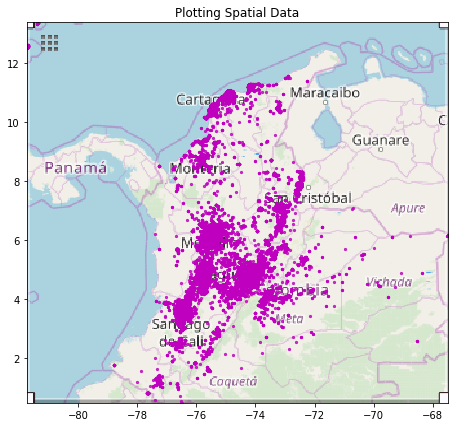

In [15]:
ruh_m = plt.imread('https://github.com/omarbecerra/Factored/blob/master/Captura.PNG?raw=true')
BBox = ((df.lon.min(), df.lon.max(), df.lat.min(), df.lat.max()))

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_venta.lon, df_venta.lat, zorder=1, alpha= 0.8, c='m', s=5)
ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [16]:
df_venta.head()

,ad_type,start_date,end_date,created_on,lat,lon,l2,l3,rooms,surface_total,surface_covered,price,title,description,property_type,operation_type
0,Propiedad,2018-12-08,2019-07-25,2018-12-08,10.998798,-74.820729,Atlántico,Barranquilla,4.0,546.0,306.0,1.000000e+09,Venta casa en La Campia en Barranquilla,Se vende espectacular casa ubicada en el barri...,Casa,Venta
1,Propiedad,2018-09-06,2019-05-22,2018-09-06,8.746055,-75.874554,Córdoba,NaN,4.0,NaN,98.0,1.100000e+08,VENDO CASA EN EL B/LA ESMERALDA- MONTERA,SILVA CUESTA INMOBILIARIA S.A.S VENDE CASA EN ...,Casa,Venta
2,Propiedad,2018-09-06,2019-05-22,2018-09-06,8.761538,-75.892666,Córdoba,NaN,4.0,NaN,98.0,1.350000e+08,VENDO CASA EN EL B/ MINUTO DE DIOS- MONTERA,SILVA CUESTAINMOBILIARIA S.A.S VENDE CASA EN E...,Casa,Venta
3,Propiedad,2018-09-06,2019-10-11,2018-09-06,8.760989,-75.874927,Córdoba,NaN,3.0,120.0,130.0,1.900000e+08,VENDO CASAS DE 1 Y 2 PISOS URB. BETANIA- MONTERA,SILVA CUESTAINMOBILIARIA S.A.S ---VENDE CASAS ...,Casa,Venta
4,Propiedad,2018-09-06,2019-06-08,2018-09-06,3.362849,-76.540670,Valle del Cauca,Cali,4.0,NaN,280.0,5.300000e+08,"CASA EN CONDOMINIO PARA VENTA EN EL SUR, CALI",HERMOSA CASA UBICADA EN EL SUR BARRIO CIUDAD J...,Casa,Venta


<bound method Axes.bar of <matplotlib.axes._subplots.AxesSubplot object at 0x7fb14237b2b0>>

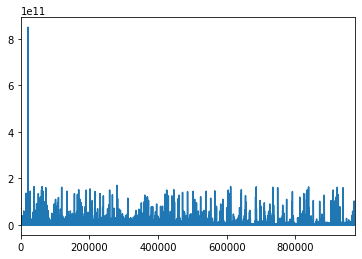

In [17]:
df_venta["price"].plot().bar

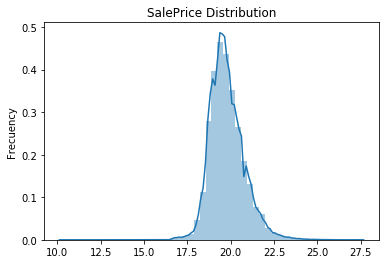

In [18]:
ax = sns.distplot(np.log(df_venta[df_venta['price']>0]['price']));
ax.set(xlabel='', ylabel='Frecuency',title ="SalePrice Distribution")
plt.show()

In [19]:
print("Skewness: %f" % df_venta['price'].skew())
print("Kurtosis: %f" % df_venta['price'].kurt())

Skewness: 54.786672
Kurtosis: 9795.751889


In [0]:
ZeroValues = (df_venta['price'].sort_values() == 0).index

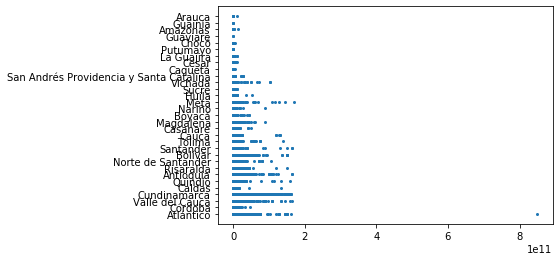

In [21]:
plt.scatter(df_venta.price,df_venta.l2, s=4)

In [22]:
df_venta = df_venta[df_venta['price']<df_venta['price'].quantile(0.99)]
df_venta = df_venta[df_venta['price']>df_venta['price'].quantile(0.02)]
print(df_venta['price'].quantile(0.98),df_venta['price'].quantile(0.01))

3250000000.0 78000000.0


In [23]:
df_venta.shape

(590316, 16)

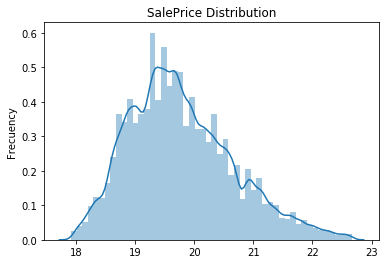

In [24]:
ax = sns.distplot(np.log(df_venta[df_venta['price']>0]['price']));
ax.set(xlabel='', ylabel='Frecuency',title ="SalePrice Distribution")
plt.show()

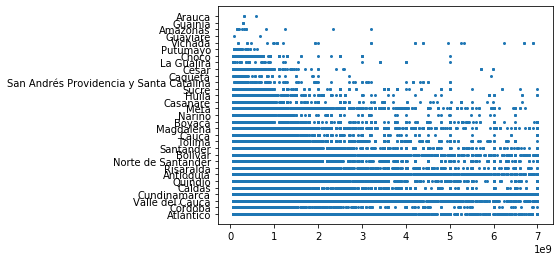

In [25]:
plt.scatter(df_venta.price,df_venta.l2, s=4)

In [26]:
df_venta.shape

(590316, 16)

In [0]:
df_venta = df_venta[~df_venta['l2'].isin(list(df_venta["l2"].value_counts().index)[-12:])]

In [28]:
df_venta['l2'].value_counts()

Cundinamarca          162121
Antioquia             122036
Valle del Cauca        69780
Atlántico              56171
Caldas                 34435
Quindío                24384
Norte de Santander     21875
Risaralda              20656
Santander              20200
Bolívar                20051
Tolima                  7714
Meta                    6250
Magdalena               5870
Cauca                   5576
Córdoba                 4954
Nariño                  2270
Boyacá                  1902
Huila                   1734
Casanare                 813
Name: l2, dtype: int64

In [29]:
df_venta

,ad_type,start_date,end_date,created_on,lat,lon,l2,l3,rooms,surface_total,surface_covered,price,title,description,property_type,operation_type
0,Propiedad,2018-12-08,2019-07-25,2018-12-08,10.998798,-74.820729,Atlántico,Barranquilla,4.0,546.0,306.0,1.000000e+09,Venta casa en La Campia en Barranquilla,Se vende espectacular casa ubicada en el barri...,Casa,Venta
1,Propiedad,2018-09-06,2019-05-22,2018-09-06,8.746055,-75.874554,Córdoba,NaN,4.0,NaN,98.0,1.100000e+08,VENDO CASA EN EL B/LA ESMERALDA- MONTERA,SILVA CUESTA INMOBILIARIA S.A.S VENDE CASA EN ...,Casa,Venta
2,Propiedad,2018-09-06,2019-05-22,2018-09-06,8.761538,-75.892666,Córdoba,NaN,4.0,NaN,98.0,1.350000e+08,VENDO CASA EN EL B/ MINUTO DE DIOS- MONTERA,SILVA CUESTAINMOBILIARIA S.A.S VENDE CASA EN E...,Casa,Venta
3,Propiedad,2018-09-06,2019-10-11,2018-09-06,8.760989,-75.874927,Córdoba,NaN,3.0,120.0,130.0,1.900000e+08,VENDO CASAS DE 1 Y 2 PISOS URB. BETANIA- MONTERA,SILVA CUESTAINMOBILIARIA S.A.S ---VENDE CASAS ...,Casa,Venta
4,Propiedad,2018-09-06,2019-06-08,2018-09-06,3.362849,-76.540670,Valle del Cauca,Cali,4.0,NaN,280.0,5.300000e+08,"CASA EN CONDOMINIO PARA VENTA EN EL SUR, CALI",HERMOSA CASA UBICADA EN EL SUR BARRIO CIUDAD J...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974964,Propiedad,2019-02-27,2019-07-25,2019-02-27,NaN,NaN,Valle del Cauca,Cali,NaN,740.0,2056.0,3.200000e+09,Guayaquil,EDIFICIO COMERCIAL ESQUINERO CON FRENTE SOBRE ...,Otro,Venta
974968,Propiedad,2019-02-27,2019-07-25,2019-02-27,4.849851,-74.077979,Cundinamarca,Chía,9.0,2650.0,600.0,2.500000e+09,CASA EN VENTA CHIA,Casa con lote de 2650 metros en lote con const...,Finca,Venta
974969,Propiedad,2019-02-27,2019-07-25,2019-02-27,NaN,NaN,Quindío,Armenia,8.0,2500.0,NaN,1.200000e+09,Casa Campestre sector Aeropuerto El Eden,Casa Campestre totalmente amoblada y dotada de...,Finca,Venta
974974,Propiedad,2019-02-27,9999-12-31,2019-02-27,7.885000,-72.508000,Norte de Santander,NaN,4.0,135.0,400.0,8.000000e+08,Edificio En Venta En Ccuta El Llano,"AMPLIO, CMODO , RPIDAS VAS DE ACCESO.",Otro,Venta
